In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import os
import scanpy as sc
from statsmodels.stats.multitest import multipletests

In [2]:
results = "../evaluation_results/within"
result_dfs = {f.split("_results.txt")[0].split("within_")[1]: pd.read_csv(os.path.join(results, f)).set_index("test_group") for f in os.listdir(results) if "within" in f}

In [3]:
for df in result_dfs:
    result_dfs[df]["$P_{adj}$"] = multipletests(result_dfs[df]["p"], method="fdr_bh", alpha=0.05)[1]

In [4]:
result_dfs = pd.concat(result_dfs)

In [5]:
result_dfs.reset_index(inplace=True)

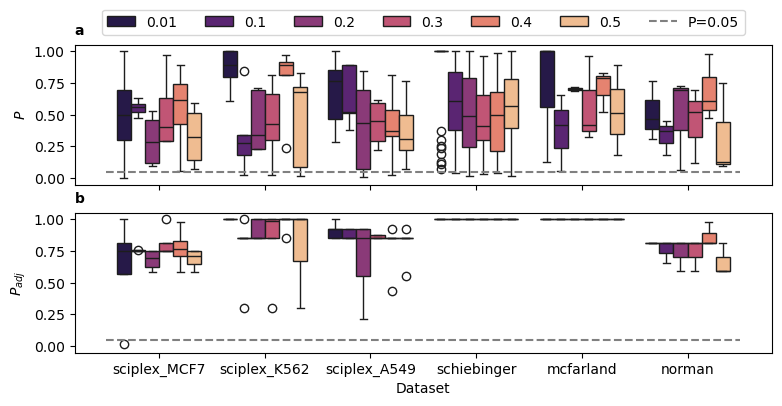

In [6]:
f, axs = plt.subplots(2, 1, figsize=(9,4), sharex=True, sharey=True)
sns.boxplot(result_dfs, x="level_0", y="p", hue="d", ax=axs[0], palette=sns.color_palette("magma", 6))
axs[0].set_ylabel("$P$")
axs[0].hlines(0.05, -0.5, 5.5, color="grey", ls="--", label="P=0.05")
axs[0].legend(ncol=7, bbox_to_anchor=(0.5,1.3), loc="upper center")
sns.boxplot(result_dfs, x="level_0", y="$P_{adj}$", hue="d", ax=axs[1], legend=False, palette=sns.color_palette("magma", 6))
axs[1].hlines(0.05, -0.5, 5.5, color="grey", ls="--")
axs[1].set_xlabel("Dataset")

labels = ["a", "b"]
for i, label in enumerate(labels):
    axs[i].text(
        0, 1.15,  # Position (normalized figure coordinates)
        labels[i],   # Corresponding letter
        transform=axs[i].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )
plt.savefig("../plots/fig4/p.pdf")

In [7]:
result_dfs

,level_0,test_group,reference,k,p,z,s,d,N,$P_{adj}$
0,sciplex_MCF7,0.0,0.0,100,1.000000,0.627328,1.000000,0.01,7784,1.000000
1,sciplex_MCF7,0.0,0.0,100,0.473176,-0.134093,1.000000,0.10,7784,0.751981
2,sciplex_MCF7,0.0,0.0,100,0.097460,-1.350728,1.000000,0.20,7784,0.584761
3,sciplex_MCF7,0.0,0.0,100,0.967604,1.804292,1.000000,0.30,7784,1.000000
4,sciplex_MCF7,0.0,0.0,100,0.684523,0.447418,1.000000,0.40,7784,0.782312
...,...,...,...,...,...,...,...,...,...,...
325,norman,control,control,100,0.181140,-0.977967,0.999831,0.10,11835,0.652105
326,norman,control,control,100,0.690861,0.462180,0.999831,0.20,11835,0.809996
327,norman,control,control,100,0.121894,-1.197429,0.999831,0.30,11835,0.588268
328,norman,control,control,100,0.469881,-0.102208,0.999831,0.40,11835,0.809996


In [8]:
result_dfs["level_0"] = result_dfs["level_0"].mask(result_dfs["level_0"].duplicated(), "")
result_dfs["test_group"] = result_dfs["test_group"].mask(result_dfs["test_group"].duplicated(), "")
result_dfs["reference"] = result_dfs["reference"].mask(result_dfs["reference"].duplicated(), "")

latex_table = result_dfs.to_latex(index=False, escape=False, column_format="|l|l|l|r|r|r|r|r|r|r|")

In [9]:
result_dfs = result_dfs.set_index("level_0")